# TP3 
### Axel Garino 
### Legajo: 12731

Trabajo práctico

Actividades

1. Resolver uno de ambos ejercicios (Opcional: resolver ambos):

    A. Resolver los ejercicios iniciales de aprendizaje por refuerzos, mostrando el paso a paso en la resolución.

    B. Implementar política de exploración Softmax, donde la probabilidad de una acción $a$ en un estado $s$ está dada por$$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{a'}e^{Q(s,a')/\tau}}$$

2. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

3. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

4. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$. Si se implementó Softmax, mostrar también cómo se desempeña el agente con distintos valores de $\tau$, por ejemplo 0.1, 1, 50, 200.

### 1. A. Resolver los ejercicios iniciales de aprendizaje por refuerzos, mostrando el paso a paso en la resolución.

1 .¿Cuál es la política o políticas óptima(s) tomando a $H$ como estado inicial?
La política óptima tomando H como estado inicial es [H,G,D,A,B,C], con recompensa de 46. Asumiendo que *γ* =1.
- H -> G = -1
- G -> D = -1
- D -> A = -1
- A -> B = -1
- B -> C = +50

Recompensa = 46

No encontré otra política óptima, una posible es
- H -> E = -5
- E -> B = -1
- B -> C = +50

Recompensa = 44


2. ¿Cuál sería el valor de $v(D)$ bajo la Política 1 (asumiendo $\gamma=1$)?

Política 1: El agente elige la primera acción posible de la siguiente lista: [Derecha, Arriba, Izquierda, Abajo]


*$v(D)$* = $\gamma$ * (-5) + $\gamma$ * (-5) + $\gamma$ * 50

*$v(D)$* = -5 -5 +50 

*$v(D)$* = 40


3. ¿Cuál es el retorno $R_t$ de un agente que, de acuerdo a su política de actuación, realiza el recorrido 
[D, E, B, C] desde $S_t = D$, asumiendo un descuento $\gamma=0.1$?

$R_t$ = -5 + $\gamma$ * (-1) + $\gamma^2$ * 50

$R_t$ = -5 + 0.1 * (-1) + 0.1^2 * 50

$R_t$ = -5 + 0.1 * (-1) + 0.01 * 50

$R_t$ = - 5 - 0.1 + 0.05 

$R_t$ = - 4.96

4. ¿Cuál sería el valor de $q(B, \text{abajo})$ bajo la Política 1, asumiendo $\gamma=1$?

q(B, abajo) = -5

q(E, derecha) = -5

q(F, arriba) = +50

El valor de q(B, abajo) bajo la política 1 asumiendo que $\gamma=1$ es de  - 5 - 5 + 50 = 40

### 2. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

In [2]:
# Importo librerias necesarias
import matplotlib.pyplot as plt
import gym
import numpy as np
from collections import defaultdict
from funciones_utiles import plot_reward_per_episode, plot_steps_per_episode, plot_steps_per_episode_smooth, draw_value_matrix

Definimos el método de elección de acciones. En este caso el mismo utiliza la política de exploración $\epsilon$-greedy.

In [3]:
def choose_action(state):
    """
    Elige una acción según el aprendizaje realizado, usando una
    política de exploración épsilon-greedy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]  # ej: para 4 acciones inicializa en [0,0,0,0]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:  # sorteamos un número: es menor a épsilon?
        return random_state.choice(actions)  # sí: se selecciona una acción aleatoria

    count = q_values.count(max_q)

    # hay más de un máximo valor de estado-acción?
    if count > 1:
        # sí: seleccionamos uno de ellos aleatoriamente
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        # no: seleccionamos el máximo valor de estado-acción
        i = q_values.index(max_q)

    return actions[i]

Definimos el esqueleto del método learn, el cuál toma una transición y cambia el dict de los valores de Q de acuerdo a algún algoritmo. 

In [4]:
def learn(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización SARSA de Q(s,a)
    """
    
    q[(state, action)] = q[(state,action)] + alpha * (reward + gamma * q[(next_state, next_action)] - q[(state,action)])

Finalmente, definimos el método principal de iteraciones.

In [5]:
def run():
    """
    Corre el agente de RL
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            
            episode_reward += reward
            learn(state, action, reward, next_state, next_action)

            if not done and t < 2000:
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

Definidos los métodos básicos, procedemos a instanciar a nuestro agente.

In [6]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

Ya instanciado, ejecutamos nuestro agente

In [7]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

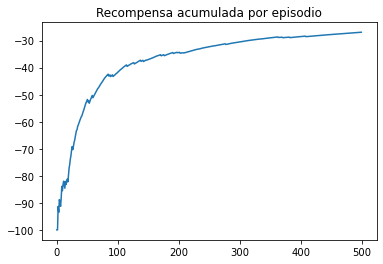

In [8]:
plot_reward_per_episode(reward_ep)

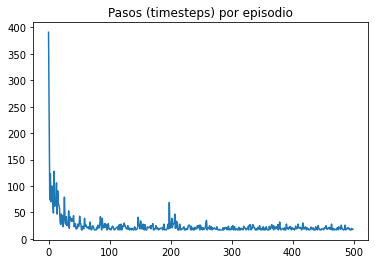

In [9]:
plot_steps_per_episode(timesteps_ep)

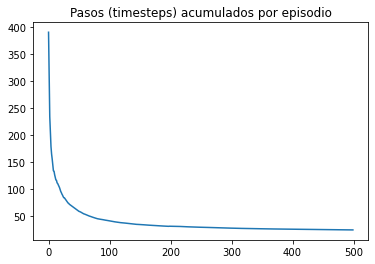

In [10]:
plot_steps_per_episode_smooth(timesteps_ep)

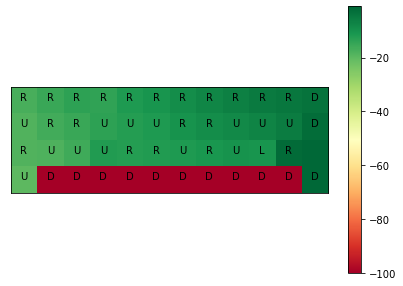


 Matriz de mejor acción-valor (en números): 

 [[ -17.23954428  -15.14316652  -13.47940719  -13.86734791  -11.50591433
   -10.42824021   -8.92910114   -7.36906975   -6.09772006   -5.02260286
    -4.246717     -3.48743802]
 [ -18.17688817  -16.29163152  -15.09887514  -13.57191616  -12.57200446
   -11.46204211  -10.28051994   -8.75636874   -8.02140089   -7.17268501
    -5.41325753   -2.24362335]
 [ -18.16818774  -17.96726471  -16.02741607  -12.12753358  -12.36502775
   -11.94064567  -11.56233996  -10.96253903   -9.96154144  -10.28531687
    -2.00258599   -1.        ]
 [ -19.72790699 -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [11]:
draw_value_matrix(q)

In [12]:
env.close()

Conclusion: Podemos observar como nuestro algoritmo se activa, donde en nuestra matriz de calor ahora tenemos el camino que se fue recorriendo.

### 3. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

In [13]:
def choose_action(state):
    """
    Elige una acción según el aprendizaje realizado, usando una
    política de exploración épsilon-greedy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]  # ej: para 4 acciones inicializa en [0,0,0,0]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:  # sorteamos un número: es menor a épsilon?
        return random_state.choice(actions)  # sí: se selecciona una acción aleatoria

    count = q_values.count(max_q)

    # hay más de un máximo valor de estado-acción?
    if count > 1:
        # sí: seleccionamos uno de ellos aleatoriamente
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        # no: seleccionamos el máximo valor de estado-acción
        i = q_values.index(max_q)

    return actions[i]

In [14]:
def learn(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización SARSA de Q(s,a)
    """
    q_values_new = [q.get((next_state, a), 0.0) for a in actions] 
    max_q_new = max(q_values_new)
    valor_anterior = q.get((state, action), 0.0)
    q[(state, action)] = valor_anterior + alpha * (reward + gamma * max_q_new -valor_anterior)

In [15]:
def run():
    """
    Corre el agente de RL
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            
            episode_reward += reward
            learn(state, action, reward, next_state, next_action)

            if not done and t < 2000:
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [16]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

In [17]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

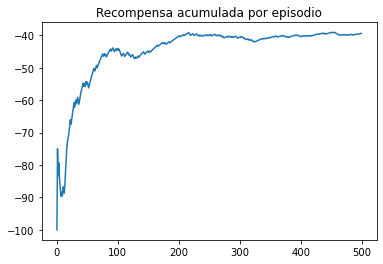

In [18]:
plot_reward_per_episode(reward_ep)

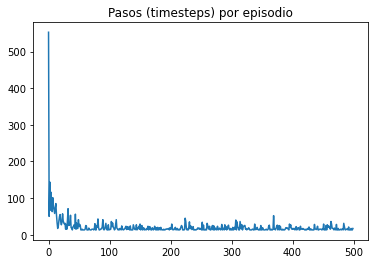

In [19]:
plot_steps_per_episode(timesteps_ep)

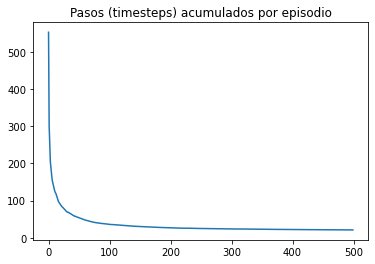

In [20]:
plot_steps_per_episode_smooth(timesteps_ep)

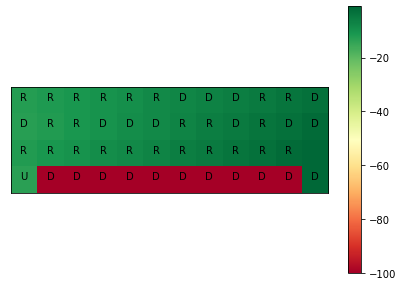


 Matriz de mejor acción-valor (en números): 

 [[ -12.3189387   -11.59140422  -10.84866451   -9.96310256   -9.18688713
    -8.34095048   -7.4542462    -6.72926453   -5.82792094   -4.91990551
    -3.95712468   -2.99947958]
 [ -12.87149892  -11.96404923  -10.98713428   -9.99742173   -8.99937844
    -7.99976186   -6.99991029   -5.99997592   -4.99999754   -3.99999928
    -2.99999988   -2.        ]
 [ -12.          -11.          -10.           -9.           -8.
    -7.           -6.           -5.           -4.           -3.
    -2.           -1.        ]
 [ -13.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [21]:
draw_value_matrix(q)

In [22]:
env.close()

CONCLUSION: como podemos observar Sarsa escoje el camino más seguro porque se aleja del acantilado, en cambio, Q-Learning escoje el camino más optimo sin importar el riesgo de caerse al acantilado.

### 4. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$.

Lo que voy a hacer a continuacion es ir variando un valor dejando el resto como está por defecto (tanto en Sarsa como en Q-Learning), de modo que podamos apreciar bien sobre que afecta cada valor. Esta variacion la voy a realizar con un numero más pequeño y uno mas grande del de por defecto.

### Sarsa

In [54]:
def learn(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización SARSA de Q(s,a)
    """
    
    q[(state, action)] = q[(state,action)] + alpha * (reward + gamma * q[(next_state, next_action)] - q[(state,action)])

#### Sarsa con alpha = 0.25

In [55]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.25
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

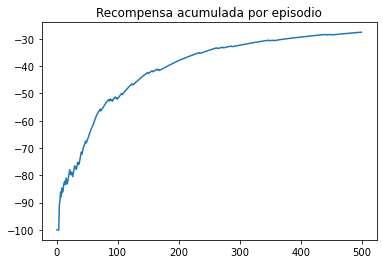

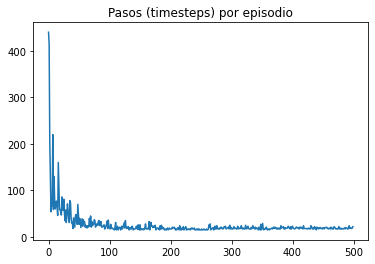

In [56]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

#### Sarsa con alpha = 0.75

In [57]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.75
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

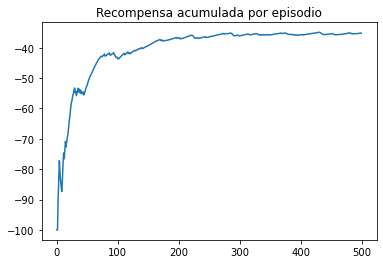

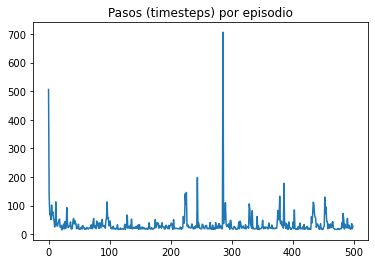

In [58]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

Conclusión: podemos observar que a mayor alpha la recompensa por episiodio es mayor.

#### Sarsa con epsilon = 0.05

In [61]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.05
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

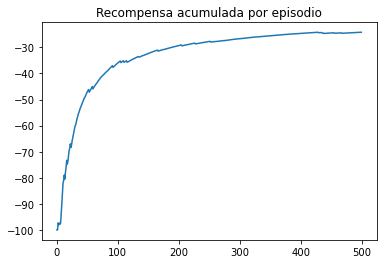

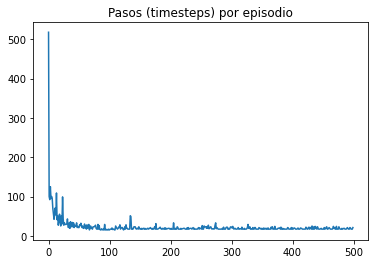

In [62]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

#### Sarsa con epsilon = 0.15

In [72]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.15
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

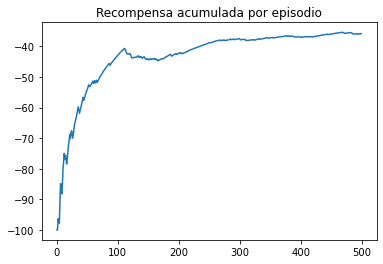

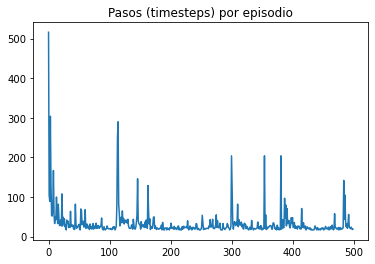

In [66]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

Conclusion: se puede observar que a menor epsilon el resultado mejora notablemente.

#### Sarsa con gamma = 0.5

In [81]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 0.5
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

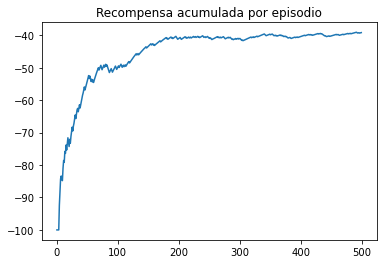

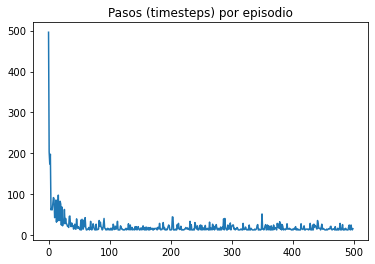

In [82]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

#### Sarsa con gamma = 1.5

In [109]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1.5
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

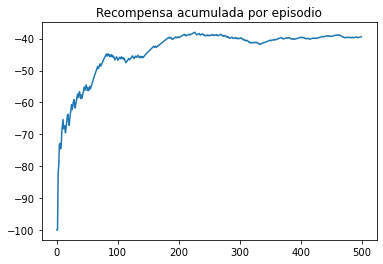

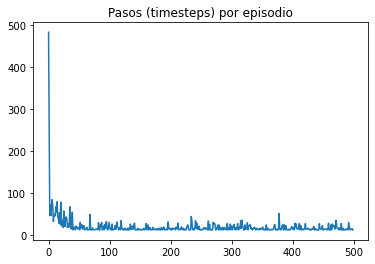

In [110]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

Conclusion: podemos observar que tanto aumentando como disminuyendo el valor de gamma en 0.5, obtenemos resultados similares. Por lo que podemos concluir que un valor de 1 o proximo a 1 es cuando mejores resultados vamos a obtener.

### Q-Learning

In [75]:
def learn(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización SARSA de Q(s,a)
    """
    q_values_new = [q.get((next_state, a), 0.0) for a in actions] 
    max_q_new = max(q_values_new)
    valor_anterior = q.get((state, action), 0.0)
    q[(state, action)] = valor_anterior + alpha * (reward + gamma * max_q_new -valor_anterior)

#### Q-Learning con alpha = 0.25

In [85]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.25
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

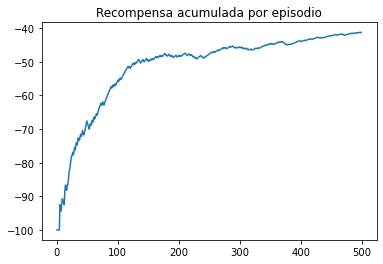

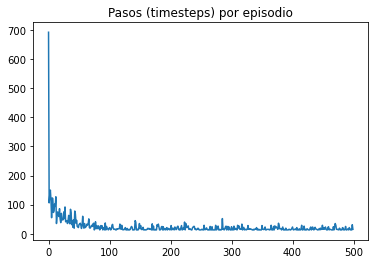

In [80]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

#### Q-Learning con alpha = 0.75

In [86]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.75
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

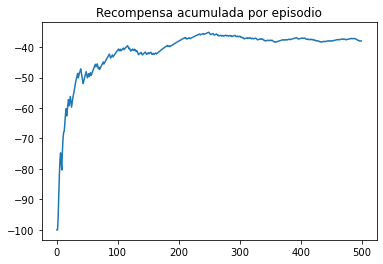

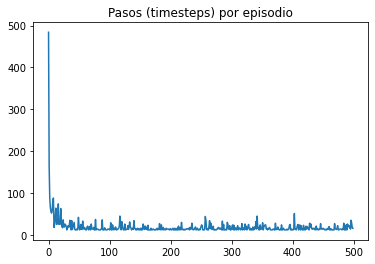

In [87]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

Conclusion: podemos observar un caso similar a que en Sarsa, donde a mayor alpha obtenemos una recompensa mayor.

#### Q-Learning con epsilon = 0.05

In [96]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.05
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

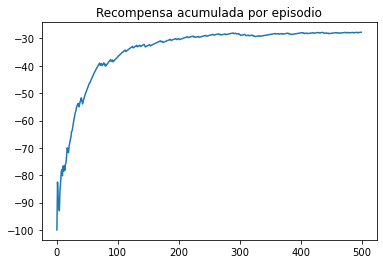

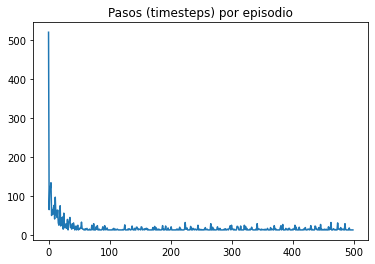

In [97]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

#### Q-Learning con epsilon = 0.15

In [102]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.15
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

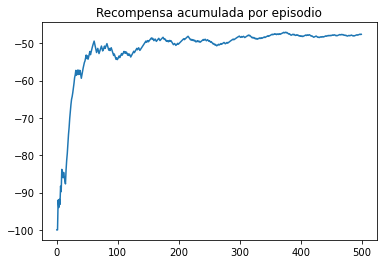

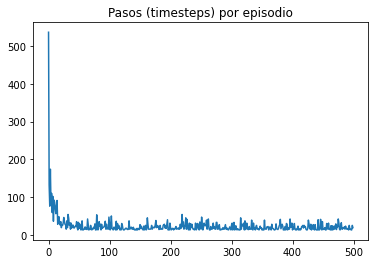

In [103]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

Observacion: caso muy similar a Sarsa nuevamente, donde a menor epsilon obtenemos un mejor resultado.

#### Q-Learning con gamma = 0.5

In [104]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 0.5
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

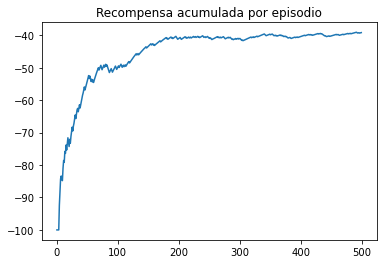

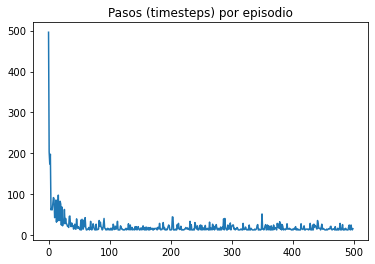

In [105]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

#### Q-Learning con gamma = 1.5

In [107]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = defaultdict(int)

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1.5
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

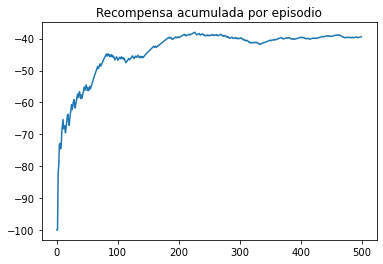

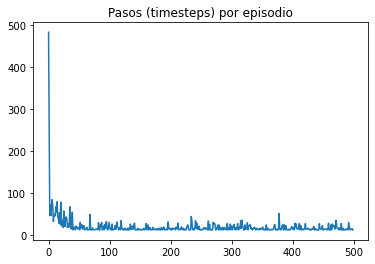

In [108]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()
plot_reward_per_episode(reward_ep)
plot_steps_per_episode(timesteps_ep)

Conclusion: volvimos a obtener resultados similares que en Sarsa. Observamos que al variar gamma el resultados son muy similares.

### Webgrafía

- https://towardsdatascience.com/reinforcement-learning-cliff-walking-implementation-e40ce98418d4
- https://studywolf.wordpress.com/2013/07/01/reinforcement-learning-sarsa-vs-q-learning/
- https://medium.com/@lgvaz/understanding-q-learning-the-cliff-walking-problem-80198921abbc